<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/REST_API_for_Flight_Price_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. REST API for Regression Model:**

**Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.**

In [1]:
!pip install --upgrade scikit-learn==1.3.2

In [2]:
!pip install flask-ngrok

In [3]:
!pip install Flask pyngrok


In [4]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import os
import pickle

In [5]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
from pyngrok import ngrok
from datetime import datetime
from google.colab import drive
from flask_ngrok import run_with_ngrok
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request, jsonify

In [6]:
app = Flask(__name__)


In [7]:
!ngrok authtoken "2kEiDvlDvDmlSrjFdidw1UnLQmx_32guShAgCSJ9W3gqsYXPA"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
def predict_price(input_data,model):
    # Prepare the input data
    #text_columns = ['from','to','']

    # Initialize an empty DataFrame
    df = pd.DataFrame([input_data])

    # Encode text-based columns and create embeddings
    for column in input_data:
        df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))



    # Make predictions using the trained Linear Regression model
    y_pred = model.predict(df)

    return y_pred[0]

In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import LabelEncoder

def predict_price(input_data,model):
    # Prepare the input data
    text_columns = ['from','to','flightType','agency']
    numerical_columns = ['month', 'speed', 'weekday_num', 'year']  # Identify numerical columns

    # Initialize an empty DataFrame
    df = pd.DataFrame([input_data])

    # Access the best estimator from GridSearchCV
    best_model = model.best_estimator_

    # Encode text-based columns using LabelEncoder
    for column in text_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

    # Convert numerical columns to appropriate data type (e.g., int)
    for column in numerical_columns:
        df[column] = df[column].astype(int)  # Convert to integer

    y_q1 = best_model.predict(df) # Use best_model here

    return y_q1[0]


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd

import pandas as pd

def predict_price1(input_data, model, label_encoder, scaler):
    # Define columns that exist in the final model
    text_columns = ['from', 'to', 'flightType', 'agency']
    numerical_columns = ['month', 'speed', 'weekday_num', 'year']

    # Convert input_data to DataFrame
    df = pd.DataFrame([input_data])

    # Access the best estimator from GridSearchCV
    best_model = model.best_estimator_

    # Encode text-based columns using LabelEncoder
    for column in text_columns:
        if column in df.columns:
            df[column] = label_encoder[column].transform(df[column])

    # Convert numerical columns to appropriate data type if they exist in the final DataFrame
    for column in numerical_columns:
        if column in df.columns:
            df[column] = df[column].astype(float)  # Use float to avoid potential issues with conversion

    # Scale numerical features using the provided scaler, only if the scaler is provided
    if scaler is not None:
        # Ensure all numerical columns are present before scaling
        missing_cols = [col for col in numerical_columns if col in df.columns]
        if missing_cols:
            df[missing_cols] = scaler.transform(df[missing_cols])

    # Make the prediction
    prediction = best_model.predict(df)

    return prediction[0]  # Assuming you want to return a single value





In [9]:
# Open the file in read-binary ('rb') mode
with open('/content/drive/MyDrive/pickle/flight_price_prediction_regression.pkl', 'rb') as file:
    model = pickle.load(file)

In [10]:
# Open the file in read-binary ('rb') mode
with open('/content/drive/MyDrive/pickle/label_encoders123.pkl', 'rb') as file:
    label = pickle.load(file)

In [11]:
import joblib

# Load the scaler
scaler = joblib.load('/content/drive/MyDrive/pickle/scaler_model00.joblib')

# Check the type to ensure it's a StandardScaler
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [ ]:
print(type(std))

<class 'numpy.ndarray'>


In [12]:
input_date={"agency":"CloudFy","flightType":"economic","from":"Recife (PE)","month":"1","speed":"300","to":"Natal (RN)","weekday_num":"4","year":"2020"}

In [13]:
predict_price1(input_date,model,label,scaler)

567.8864

In [21]:
NGROK_AUTH_TOKEN = "2kEiDvlDvDmlSrjFdidw1UnLQmx_32guShAgCSJ9W3gqsYXPA"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

app = Flask(__name__)
#run_with_ngrok(app)


@app.route('/', methods=['GET', 'POST'])
def predict():
    return """

<!DOCTYPE html>
<html>

<head>
    <title>Flight Price Prediction</title>
    <style>
        body {
            font-family: 'Poppins', sans-serif;
            background-color: #f9f9f9;
            margin: 0;
            padding: 0;
        }

        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 40px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 10px 20px rgba(0, 0, 0, 0.1);
            text-align: center;
        }

        h1 {
            color: #39dde0;
            font-size: 36px;
            margin-bottom: 20px;
        }

        form {
            text-align: left;
        }

        input[type="text"],
        input[type="number"] {
            width: 100%;
            padding: 15px;
            margin: 15px 0;
            border: none;
            border-bottom: 2px solid #39dde0;
            font-size: 18px;
            background-color: transparent;
            color: #39dde0;
            transition: border-bottom 0.3s ease;
        }

        input[type="text"]:focus,
        input[type="number"]:focus {
            border-bottom: 2px solid #39dde0;
            outline: none;
        }

        input[type="radio"] {
            margin-right: 10px;
        }

        input[type="submit"] {
            background-color: #39dde0;
            color: #fff;
            padding: 15px 30px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 20px;
            transition: background-color 0.3s ease;
        }

        input[type="submit"]:hover {
            background-color: #39dde0;
        }

        p#prediction {
            margin-top: 20px;
            font-size: 24px;
            color: #39dde0;
        }
    </style>
</head>

<body>
    <div class="container">
        <h1>Flight Price Prediction</h1>
        <hr style="border: 1px solid #39dde0; width: 80%; margin: 20px auto;">
        <form action="/predict" method="POST">

            <label>Departure City:</label><br><br>


            <input type="radio" name="From" value="Aracaju (SE)">Aracaju (SE)<br>
            <input type="radio" name="From" value="Brasilia (DF)">Brasilia (DF)<br>
            <input type="radio" name="From" value="Campo Grande (MS)">Campo Grande (MS)<br>
            <input type="radio" name="From" value="Florianopolis (SC)">Florianopolis (SC)<br>
            <input type="radio" name="From" value="Natal (RN)">Natal (RN)<br>
            <input type="radio" name="From" value="Recife (PE)">Recife (PE)<br>
            <input type="radio" name="From" value="Rio de Janeiro (RJ)">Rio de Janeiro (RJ)<br>
            <input type="radio" name="From" value="Salvador (BH)">Salvador (BH)<br>
            <input type="radio" name="From" value="Sao Paulo (SP)">Sao Paulo (SP)<br><br>

            <hr style="border: 1px solid #39dde0; width: 100%; margin: 20px auto;">

            <label>Destination City:</label><br><br>

            <input type="radio" name="To" value="Aracaju (SE)">Aracaju (SE)<br>
            <input type="radio" name="To" value="Brasilia (DF)">Brasilia (DF)<br>
            <input type="radio" name="To" value="Campo Grande (MS)">Campo Grande (MS)<br>
            <input type="radio" name="To" value="Florianopolis (SC)">Florianopolis (SC)<br>
            <input type="radio" name="To" value="Natal (RN)">Natal (RN)<br>
            <input type="radio" name="To" value="Recife (PE)">Recife (PE)<br>
            <input type="radio" name="To" value="Rio de Janeiro (RJ)">Rio de Janeiro (RJ)<br>
            <input type="radio" name="To" value="Salvador (BH)">Salvador (BH)<br>
            <input type="radio" name="To" value="Sao Paulo (SP)">Sao Paulo (SP)<br><br>

            <hr style="border: 1px solid #39dde0; width: 100%; margin: 20px auto;">

            <label>Flight Type:</label><br><br>

            <input type="radio" name="flightType" value="economic"> Economic<br>
            <input type="radio" name="flightType" value="firstClass"> FirstClass<br>
            <input type="radio" name="flightType" value="premium"> Premium<br><br>

            <hr style="border: 1px solid #39dde0; width: 100%; margin: 20px auto;">


            <label>Agency:</label><br><br>


            <input type="radio" name="agency" value="CloudFy"> CloudFy<br>
            <input type="radio" name="agency" value="FlyingDrops"> FlyingDrops<br>
            <input type="radio" name="agency" value="Rainbow"> Rainbow<br><br>

            <hr style="border: 1px solid #39dde0; width: 100%; margin: 20px auto;">

            <label for="weekday_num">Weekday (0=Sunday, 6=Saturday):</label>
            <input type="number" name="weekday_num" min="0" max="6" placeholder="Day of the week"><br>

            <label for="month">Month:</label>
            <input type="number" name="month" min="1" max="12" placeholder="Month"><br>

            <label for="year">Year:</label>
            <input type="number" name="year" min="2019" max="2123" placeholder="Year"><br>

            <label for="speed">Speed (km/h):</label>
            <input type="number" name="speed" placeholder="Speed"><br><br>

            <input type="submit" value="Predict">
        </form>
        <p id="prediction"></p>
    </div>
</body>

</html>


    """

@app.route('/predict', methods=['POST'])
def index():
    if request.method == 'POST':
        # Get input data from the form
        From = request.form.get('From')
        To = request.form.get('To')
        flighttype = request.form.get('flightType')
        agency = request.form.get('agency')
        weekday_num = request.form.get('weekday_num')
        month = request.form.get('month')
        year = request.form.get('year')
        speed = request.form.get('speed')

        # Create a dictionary to store the input data
        data = {
            'from': From,
            'to': To,
            'flightType': flighttype,
            'agency': agency,
            'weekday_num': weekday_num,
            'month': month,
            'year': year,
            'speed': speed
        }

        # Perform prediction using the custom_input dictionary
        prediction = predict_price1(data,model,label,scaler)
        prediction = str(prediction)

        return jsonify({'Your Flight Price($) will be around': prediction})

# Open a tunnel on the default port 5000
public_url = ngrok.connect(5000)
print(f"Your Flask app is running on {public_url}")

if __name__ == "__main__":
    app.run()

Your Flask app is running on NgrokTunnel: "https://b0e7-35-185-139-110.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Aug/2024 07:36:55] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Aug/2024 07:36:56] "GET /favicon.ico HTTP/1.1" 404 -


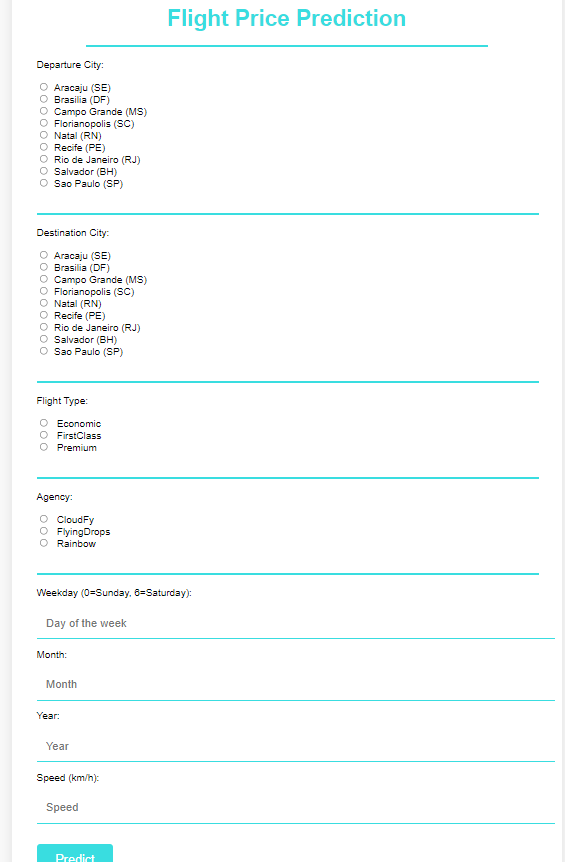